In [2]:
# Import needed packages for classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import packages for evaluation
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset
skySurvey = pd.read_csv('SDSS.csv')
skySurvey.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
# Create a new feature from u - g
skySurvey['u_g'] = skySurvey['u'] - skySurvey['g']
#skySurvey['u'].head(1)
#skySurvey['g'].head(1)
#skySurvey['u_g'].head(1)
# Create dataframe X with features redshift and u_g
X = skySurvey[['redshift', 'u_g']]

# Create dataframe y with feature class
y = skySurvey[['class']]

In [5]:
np.random.seed(42)

In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
# Initialize model with k=3
skySurveyKnn = KNeighborsClassifier(n_neighbors=3)

In [8]:
# Fit model using X_train and y_train
skySurveyKnn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Find the predicted classes for X_test
y_pred = skySurveyKnn.predict(X_test)
print(y_pred)

['GALAXY' 'QSO' 'GALAXY' ... 'STAR' 'STAR' 'GALAXY']


In [15]:
print(np.ravel(y_test))

['GALAXY' 'QSO' 'GALAXY' ... 'STAR' 'STAR' 'GALAXY']


<Axes: ylabel='Count'>

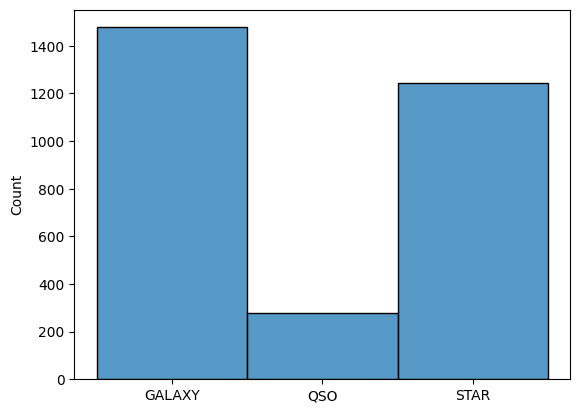

In [16]:
sns.histplot(data=y_pred)#predicted data

<Axes: ylabel='Count'>

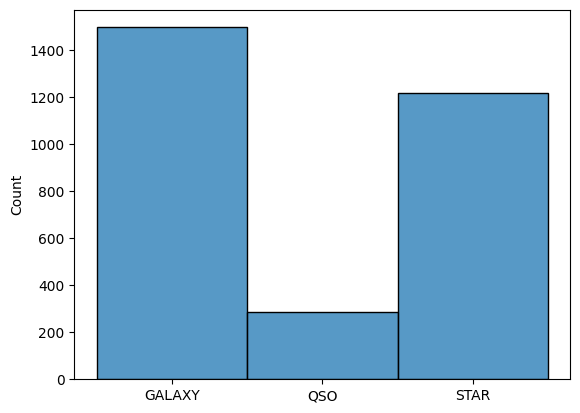

In [17]:
sns.histplot(np.ravel(y_test))#actual data

In [10]:
# Calculate accuracy score
score = skySurveyKnn.score(X_test, np.ravel(y_test))

In [11]:
# Print accuracy score
print('Accuracy score is ', end="")
print('%.3f' % score)

Accuracy score is 0.984
